In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv('heart.csv')
data

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


**Attribute Information**

*   Age: age of the patient [years]
*   Sex: sex of the patient [M: Male, F: Female]
*   ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
*   RestingBP: resting blood pressure [mm Hg]
*   Cholesterol: serum cholesterol [mm/dl]
*   FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
*   RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
*   MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
*   ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
*   Oldpeak: oldpeak = ST [Numeric value measured in depression]
*   ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
*   HeartDisease: output class [1: heart disease, 0: Normal]

In [13]:
age = data['Age']
bp = data['RestingBP']
hr = data['MaxHR']
ch = data['Cholesterol']
heartDisease = data['HeartDisease']

In [6]:
def stats_u(data,col):
    if data[col].dtype == "float64" or data[col].dtype == "int64":
        print(col,"has Quantitative data")
        mean_value=data[col].mean()
        print('mean of',col,'column',mean_value)
        median_value = data[col].median(skipna = True)
        print('median of',col,'column',median_value)
        std_value = data[col].std()
        print('standard deviation of',col,'column',std_value)
        q1 = data[col].quantile(0.25,interpolation='nearest')
        print('quartile 1 of',col,'column is',q1)
        q2 = data[col].quantile(0.5,interpolation='nearest')
        print('quartile 2 of',col,'column is',q2)
        q3 = data[col].quantile(0.75,interpolation='nearest')
        print('quartile 3 of',col,'column is',q3)
        q4 = data[col].quantile(1,interpolation='nearest')
        print('quartile 4 of',col,'column is',q4)
        IQR = q3 - q1
        LLP = q1 - 1.5*IQR
        ULP = q3 + 1.5*IQR
        print('Lower Limit Point:',LLP)
        print('Upper Limit Point:',ULP)
    else:
        print(col,'has Qualitative Data')

In [7]:
cols=data.columns
for i in cols:
    print('\033[1m'+i+'\033[0m')
    stats_u(data,i)
    print("\n")

Age
Age has Quantitative data
mean of Age column 53.510893246187365
median of Age column 54.0
standard deviation of Age column 9.432616506732007
quartile 1 of Age column is 47
quartile 2 of Age column is 54
quartile 3 of Age column is 60
quartile 4 of Age column is 77
Lower Limit Point: 27.5
Upper Limit Point: 79.5


Sex
Sex has Qualitative Data


ChestPainType
ChestPainType has Qualitative Data


RestingBP
RestingBP has Quantitative data
mean of RestingBP column 132.39651416122004
median of RestingBP column 130.0
standard deviation of RestingBP column 18.514154119907808
quartile 1 of RestingBP column is 120
quartile 2 of RestingBP column is 130
quartile 3 of RestingBP column is 140
quartile 4 of RestingBP column is 200
Lower Limit Point: 90.0
Upper Limit Point: 170.0


Cholesterol
Cholesterol has Quantitative data
mean of Cholesterol column 198.7995642701525
median of Cholesterol column 223.0
standard deviation of Cholesterol column 109.38414455220337
quartile 1 of Cholesterol column 

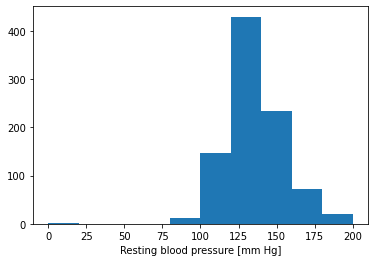

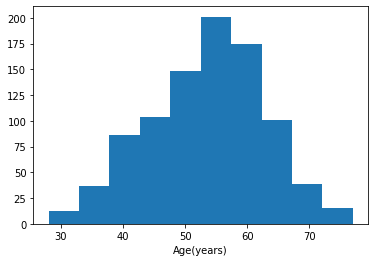

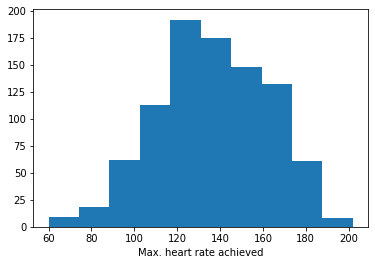

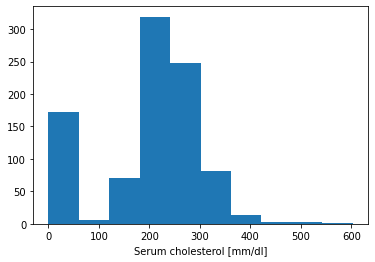

In [8]:
# Histograms

plt.hist(bp)
plt.xlabel("Resting blood pressure [mm Hg]")
plt.show()
plt.hist(age)
plt.xlabel("Age(years)")
plt.show()
plt.hist(hr)
plt.xlabel("Max. heart rate achieved")
plt.show()
plt.hist(ch)
plt.xlabel("Serum cholesterol [mm/dl]")
plt.show()

/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is de

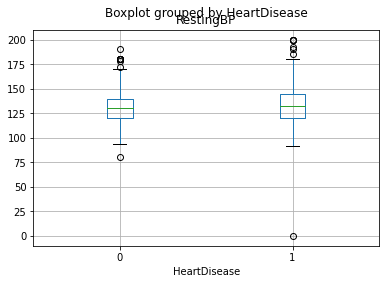

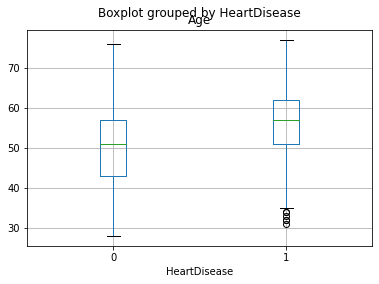

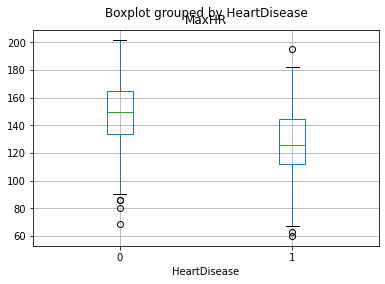

In [14]:
# Box Plots

data.boxplot(column=["RestingBP"], by="HeartDisease")
data.boxplot(column=["Age"], by="HeartDisease")
data.boxplot(column=["MaxHR"], by="HeartDisease")

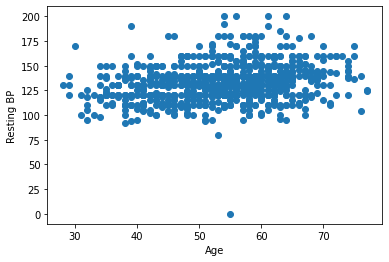

In [10]:
#Scatter Plots

plt.scatter(age, bp)
plt.xlabel("Age")
plt.ylabel("Resting BP")
plt.show()

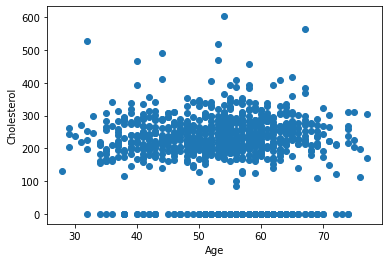

In [11]:
plt.scatter(age, ch)
plt.xlabel("Age")
plt.ylabel("Cholesterol")
plt.show()

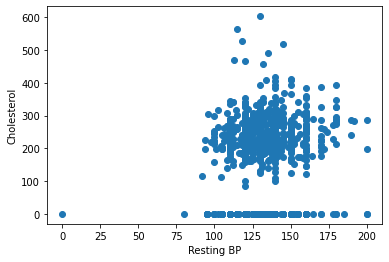

In [12]:
plt.scatter(bp, ch)
plt.xlabel("Resting BP")
plt.ylabel("Cholesterol")
plt.show()